In this blog, I will explain what's linear regression and its implementation in using sklearn <br>

-  ***What's Linear Regression?*** <br>

let's say you want to predict the housing price in Chicago. What information you would like to know?<br>

-  __Location?__ Lincoln Park,or Logan Square, or Lake view, or South Loop<br>
-  __Transportation?__, any CTA route nearby?<br>
-  __Average drive time to Chicago Loop?__, 10 min/20min/30min/or above<br>
-  __What is the school district rating?__, 1,2,3,..<br>
-  __What's the historical crime rate in this area?__, 1/month, 5/month, 10/month <br>

These five factors could predict the housing price. Then you will request your housing agent to send you a list of houses sold on the market and their corresponding location, transportation, driving time, schools ratings, crime rate. <br>

After reviewing the information, you will start to get a sense of how the house will be priced based on those factors. Therefore, when you are on a house purchasing tour, you already have some idea of how the house would be priced based on the previously shared data. <br>

Hold on a second, did you just build a regression model in your mind to estimate housing price, yes you did it :) <br>


The location, transportation, average drive time, schools district rating, and crime rate are __predictor variables__ in our regression; while the housing price is the __target variable__ you are trying to predict. __By giving the historical input & output pairs, you map out the relationship__ (e.g. linear) __between the input__ (e.g. crime rate) __and output__ (e.g. housing price).

-  ***Linear Regression Implementation  using Sklearn *** <br>

In [1]:
# import libraries
from sklearn import datasets
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Let's use the Boston housing dataset as an example. For simplicity, I chose only one variable - the number of rooms and limit the observation to the first 10 records. In addition, I will try to predict the 11th record’s housing price and see how the model perform.

In [2]:
# load the sklearn example dataset 
boston = datasets.load_boston()

# y represents the housing price
y = boston.target[0:10]

# x represents the number of rooms
x = boston.data[:,np.newaxis,5][0:10]

First, Let's visualize the interaction between housing price and the number of rooms using a scatter plot. Based on the plot here, you can notice there is an obvious linear relationship between the price and the number of rooms more rooms means more $$ to put down.

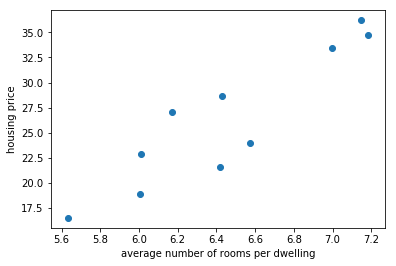

In [3]:
# plot those 10 points
plt.scatter(x, y)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('housing price')
plt.show()

Then let's fit the data and build a linear model.

In [4]:
# set linear regression as the model
model = linear_model.LinearRegression()

# fit the model with (input, output)
model.fit(x, y)

# output the linear regression model coefficients and intercept
print('Slope of the Line: ', model.coef_)
print('When the input x equal to zero, Y equals:', model.intercept_)

Slope of the Line:  [11.82850406]
When the input x equal to zero, Y equals: -49.98256496765094


We successfully map the relationship between the number of rooms and housing pricing using this green straight line. 

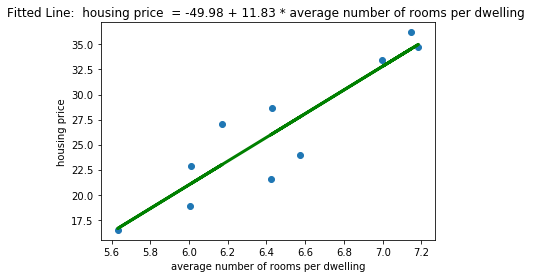

In [5]:
# Plot the line
y_pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='green', linewidth=3)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('housing price')
plt.title('Fitted Line:  housing price  = %.2f + %.2f * average number of rooms per dwelling ' 
      % (model.intercept_, model.coef_[0]))
plt.show()

After finding this fitted line, we can give the model new input and ask it to predict the housing price.<br>

Let’s grab our 11th data point.


In [6]:
# select the 11th data points for testing
y_test = boston.target[10:11]
x_test = boston.data[:,np.newaxis,5][10:11]

In [7]:
#make the prediction using the new input 
y_test_pred = model.predict(x_test)
print(y_test_pred )

[25.44780542]


The model predicts the housing price to be $25.45k based on the new input. So how close is this prediction to the actual pricing?

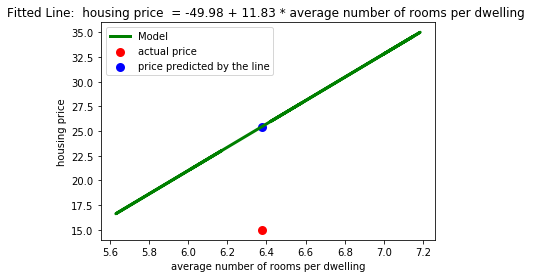

In [8]:
# Add the test set in to the plot
plt.scatter(x_test, y_test,color='red',linewidth=3,label="actual price")
plt.scatter(x_test, y_test_pred, color='blue', linewidth=3,label="price predicted by the line")
plt.plot(x, y_pred, color='green', linewidth=3,label="Model")
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('housing price')
plt.title('Fitted Line:  housing price  = %.2f + %.2f * average number of rooms per dwelling ' 
      % (model.intercept_, model.coef_[0]))
plt.legend(loc='upper left')
plt.show()

Well, the actual price (red dot) for this house is $15k, the model far overestimated the price by almost 60%, a 25k (blue dot).
In my next blog, I will explain the way to improve on this model, so that it can predict the price more accurately.
